In [1]:
%pylab inline
from pandas import *
from scipy.stats import ttest_ind, pearsonr, skew, skewnorm

from numpy import polyfit, round

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
satellite_asteroids = read_csv('satellite_asteroids.csv')
main_belt = concat([read_csv('main_belt_final.csv'), read_csv('main_belt_2_5.csv'), read_csv('main_belt_2_8.csv')])
inner_main_belt = read_csv('inner_main_belt.csv')
outer_main_belt = read_csv('outer_main_belt.csv')
outer_asteroids = read_csv('outer_system.csv')
inner_asteroids = read_csv('inner_system.csv')

temp = [main_belt, outer_main_belt, inner_main_belt, inner_asteroids, outer_asteroids]

asteroids = concat(temp, axis=0)
asteroids.reset_index()

,index,a,e,i,w,q,ad,per.y,H,diameter,albedo,rot_per
0,0,3.142,0.1116,3.83,312.49,2.791,3.49,5.57,5.60,407.120,0.0717,13.8280
1,1,2.924,0.1339,3.10,229.22,2.533,3.32,5.00,6.14,226.000,0.1203,4.1960
2,2,2.910,0.0984,13.70,357.60,2.624,3.20,4.96,6.63,167.536,0.1660,4.1483
3,3,3.142,0.1224,0.75,107.60,2.758,3.53,5.57,7.25,198.000,0.0670,8.3740
4,4,3.164,0.2179,26.28,61.56,2.475,3.85,5.63,6.86,267.080,0.0530,5.5300
...,...,...,...,...,...,...,...,...,...,...,...,...
1205163,16810,43.670,0.1174,9.48,167.66,38.545,48.80,289.00,8.13,NaN,NaN,NaN
1205164,16811,5.404,0.0380,35.71,90.37,5.199,5.61,12.60,15.13,NaN,NaN,NaN
1205165,16812,113.400,0.6494,13.69,14.72,39.745,186.98,1210.00,8.28,NaN,NaN,NaN
1205166,16813,43.610,0.0659,2.05,74.64,40.741,46.48,288.00,7.11,NaN,NaN,NaN


In [3]:
bool_index = notnull(asteroids.H)
mag_asteroids = asteroids[bool_index]

In [4]:
bool_index = notnull(asteroids.diameter)
diam_asteroids = asteroids[bool_index]

Semimajor axis of index 0 is 1.7787924478251473
Semimajor axis of index 1 is 1.9082280286576032
Semimajor axis of index 2 is 2.064105790784986
Semimajor axis of index 3 is 2.500486092146311
Semimajor axis of index 4 is 2.8236570029107275
Semimajor axis of index 5 is 2.9565649424259464
Semimajor axis of index 6 is 3.2765637036657393


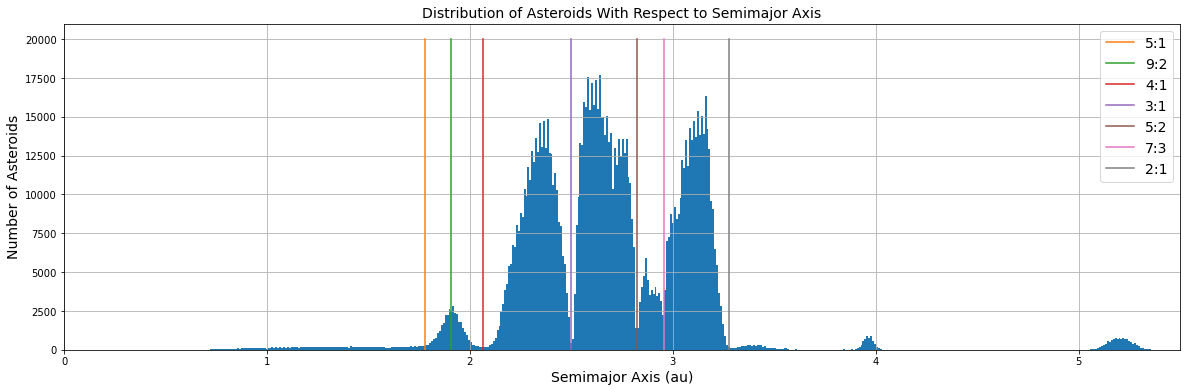

In [5]:
ax = asteroids.a[asteroids.a < 10].hist(bins=1000, figsize=(20,6))
title('Distribution of Asteroids With Respect to Semimajor Axis', size=14)
plt.xlabel(xlabel='Semimajor Axis (au)', fontsize=14)
plt.ylabel(ylabel='Number of Asteroids', fontsize=14)
ax.set_xlim(0, 5.5)

#kepler's 3rd law: P^2 = a^3
jupiter_per = 11.862
resonances = [1./5., 2./9., 1./4., 1./3., 2./5., 3./7., 1./2.]



for i in range(len(resonances)):
    plot([(resonances[i] * jupiter_per)**(2/3), (resonances[i] * jupiter_per)**(2/3)], [0, 20000])
    print('Semimajor axis of index', i, 'is', (resonances[i] * jupiter_per)**(2/3))
    
legend(['5:1', '9:2', '4:1', '3:1', '5:2', '7:3', '2:1'], prop={'size' : 14})
plt.savefig('asteroid-distribution.png')


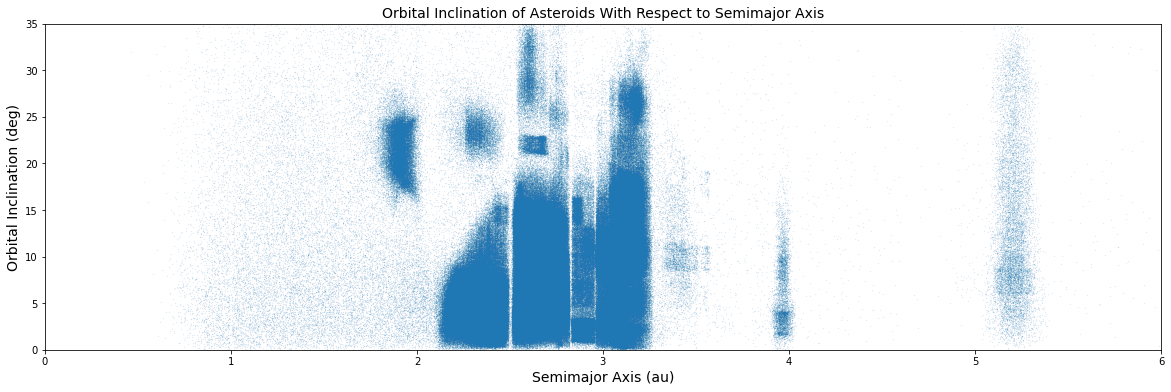

In [6]:
from fractions import Fraction
plt.figure(figsize=(20,6))

plot(asteroids.a, asteroids.i, 'o', ms=0.05)

title('Orbital Inclination of Asteroids With Respect to Semimajor Axis', size=14)
plt.ylim([0,35])
plt.xlim([0,6])

plt.xlabel('Semimajor Axis (au)', size=14)
plt.ylabel('Orbital Inclination (deg)', size=14)

plt.savefig('asteroid-inclinations.png')


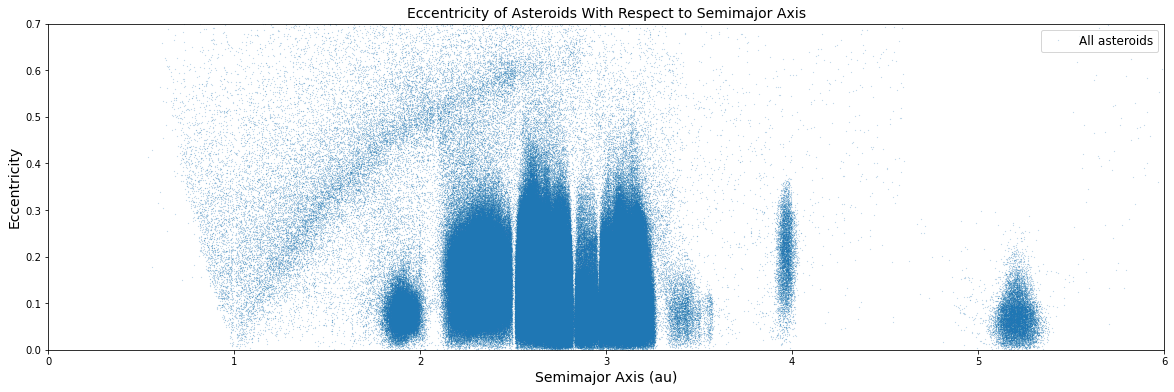

In [7]:
plt.figure(figsize=(20,6))
plot(asteroids.a, asteroids.e, 'o', ms=0.1)

#valid_ap = inner_asteroids[inner_asteroids.ad > 0.95] #asteroids with aphelion equal to Earth's orbit
#valid_ap = valid_ap[valid_ap.ad < 1.05]
#plot(valid_ap.a, valid_ap.e, 'o', ms=1)

#valid_peri = inner_asteroids[inner_asteroids.q > 0.98] #asteroids with perihelion equal to Earth's orbit
#valid_peri = valid_peri[valid_peri.q < 1.02]
#plot(valid_peri.a, valid_peri.e, 'o', ms=1)

#valid_peri = inner_asteroids[inner_asteroids.q > 1.5] ##asteroids with perihelion equal to Mars' orbit
#valid_peri = valid_peri[valid_peri.q < 1.54]
#plot(valid_peri.a, valid_peri.e, 'o', ms=1)

#valid_peri = main_belt[main_belt.q > 1.99]
#valid_peri = valid_peri[valid_peri.q < 2.01]
#plot(valid_peri.a, valid_peri.e, 'o', ms=1)

#valid_peri = asteroids[asteroids.q > 2.78]
#valid_peri = valid_peri[valid_peri.q < 2.82]
#plot(valid_peri.a, valid_peri.e, 'o', ms=1)

#valid_peri = asteroids[asteroids.q > 3.8]
#valid_peri = valid_peri[valid_peri.q < 4.2]
#plot(valid_peri.a, valid_peri.e, 'o', ms=1)

plt.ylim([0,0.7])
plt.xlim([0,6])

title('Eccentricity of Asteroids With Respect to Semimajor Axis', size=14)

plt.xlabel('Semimajor Axis (au)', size=14)
plt.ylabel('Eccentricity', size=14)
legend(['All asteroids', 'Asteroids with aphelion equal to 1', 'Asteroids with perihelion equal to 1', 'Asteroids with perihelion equal to 1.52'], loc='upper right', 
       prop={'size' : 12})

plt.savefig('eccentricity-distribution.png')

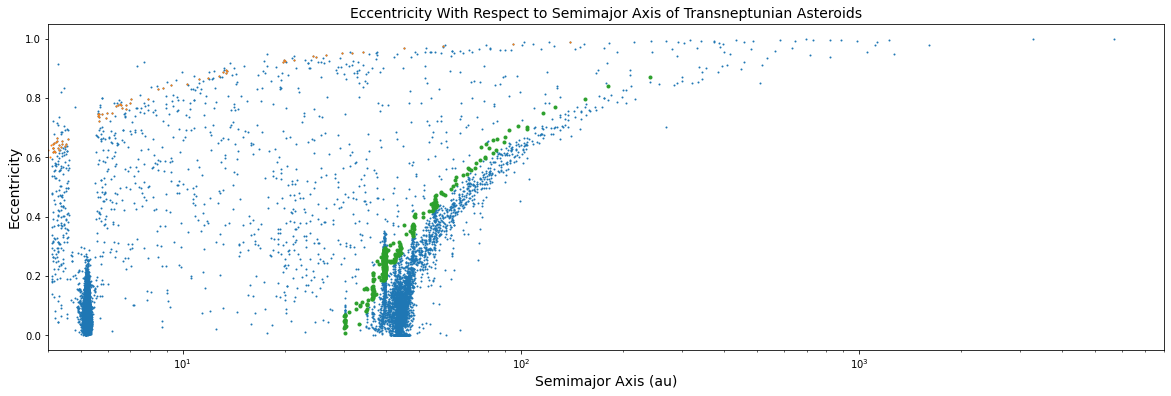

In [8]:
plt.figure(figsize=(20,6))

semilogx(asteroids.a[asteroids.a > 4.1], asteroids.e[asteroids.a > 4.1], 'o', ms=1)
xlim(4, 8000)

title('Eccentricity With Respect to Semimajor Axis of Transneptunian Asteroids', size=14)

plt.xlabel('Semimajor Axis (au)', size=14)
plt.ylabel('Eccentricity', size=14)

valid_peri = asteroids[asteroids.q > 1.42] ##asteroids with perihelion equal to Mars' orbit
valid_peri = valid_peri[valid_peri.q < 1.62]
plot(valid_peri.a, valid_peri.e, 'o', ms=1)

valid_peri = asteroids[asteroids.q > 28] #asteroids with perihelion equal to Jupiter's orbit
valid_peri = valid_peri[valid_peri.q < 32]
plot(valid_peri.a, valid_peri.e, 'o', ms=3)


<AxesSubplot:>

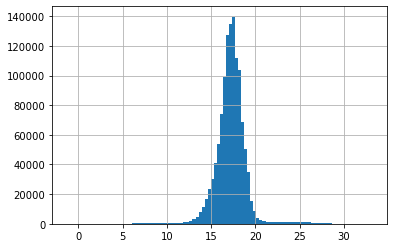

In [9]:
#looking to see the distribution of magnitude values to 
#figure out where we should split the data
mag_asteroids.H.hist(bins=100)

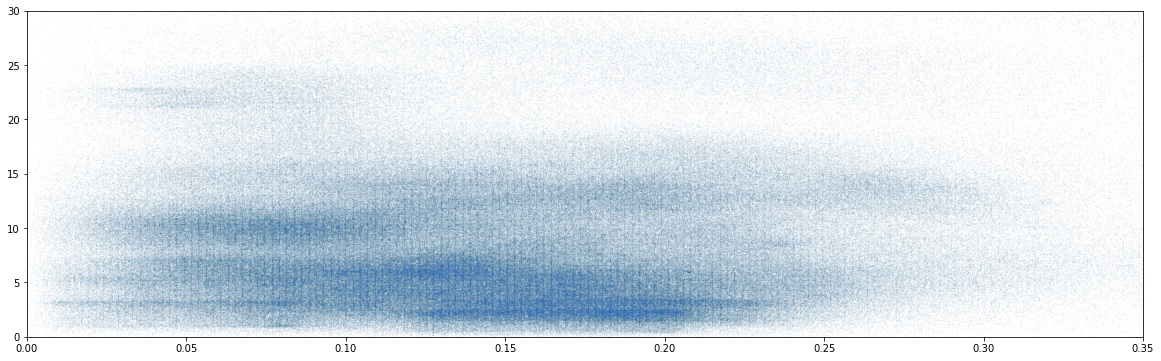

In [10]:
figure(figsize=(20,6))
ylim(0,30)
xlim(0, 0.35)
plot(asteroids.e, asteroids.i, 'o', ms=0.015)

(0.0, 4.5)

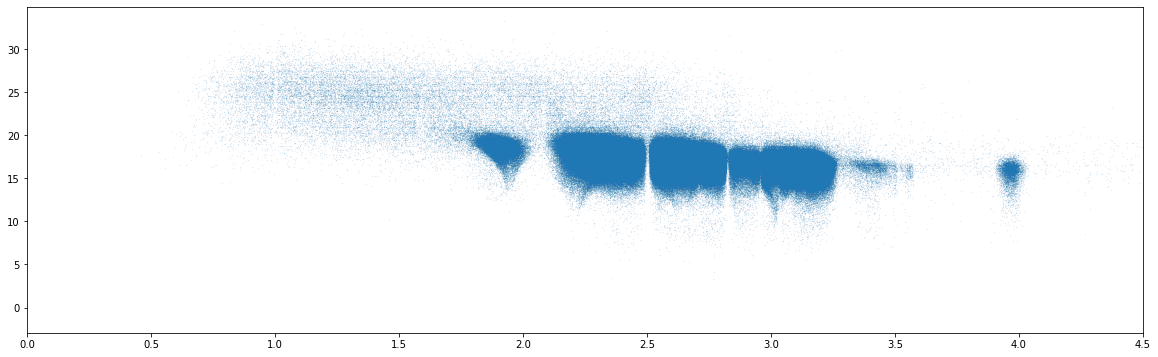

In [11]:
plt.figure(figsize=(20,6))

plot(mag_asteroids.a, mag_asteroids.H, 'o', ms=0.05)

plt.xlim([0,4.5])


R =  -0.15611386065585064 p = 0.0


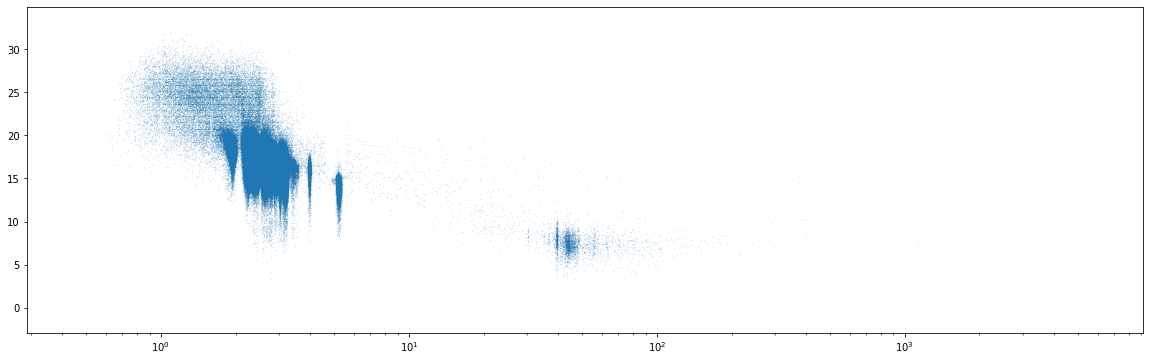

In [12]:
#the following plot shows that there is a strong correlation between magnitude and semi-major axis
#needs to be investigated whether this is real, or if it's a data skew
figure(figsize=(20,6))
semilogx(asteroids.a, asteroids.H, 'o', ms = 0.05)

R, p = pearsonr(mag_asteroids.a, mag_asteroids.H)
print('R = ', R, 'p =', p)

(0.0, 4.5)

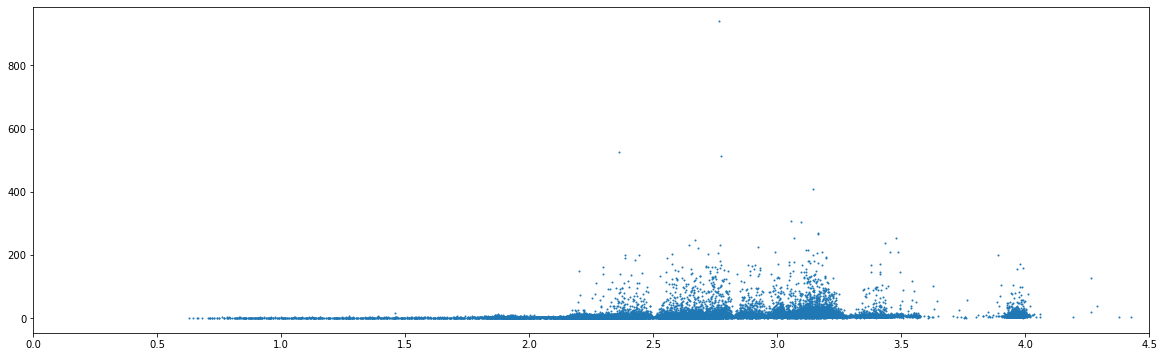

In [13]:
plt.figure(figsize=(20,6))
plot(diam_asteroids.a, diam_asteroids.diameter, 'o', ms=1)
plt.xlim([0,4.5])

SpearmanrResult(correlation=-0.7439939278348632, pvalue=0.0)


,a,e,i,w,q,ad,per.y,H,diameter,albedo,rot_per
0,3.142,0.1116,3.83,312.49,2.791,3.49,5.57,5.60,407.120,0.0717,13.8280
1,2.924,0.1339,3.10,229.22,2.533,3.32,5.00,6.14,226.000,0.1203,4.1960
2,2.910,0.0984,13.70,357.60,2.624,3.20,4.96,6.63,167.536,0.1660,4.1483
3,3.142,0.1224,0.75,107.60,2.758,3.53,5.57,7.25,198.000,0.0670,8.3740
4,3.164,0.2179,26.28,61.56,2.475,3.85,5.63,6.86,267.080,0.0530,5.5300
...,...,...,...,...,...,...,...,...,...,...,...
11010,12.570,0.7859,130.40,167.44,2.692,22.46,44.60,13.60,15.239,0.0280,NaN
11570,5.165,0.1203,16.26,230.03,4.543,5.79,11.70,13.70,8.168,0.0130,NaN
12163,6.588,0.7853,24.15,296.87,1.415,11.76,16.90,17.60,1.526,0.0700,NaN
12748,5.171,0.0506,27.94,10.70,4.909,5.43,11.80,13.60,9.613,0.1000,NaN


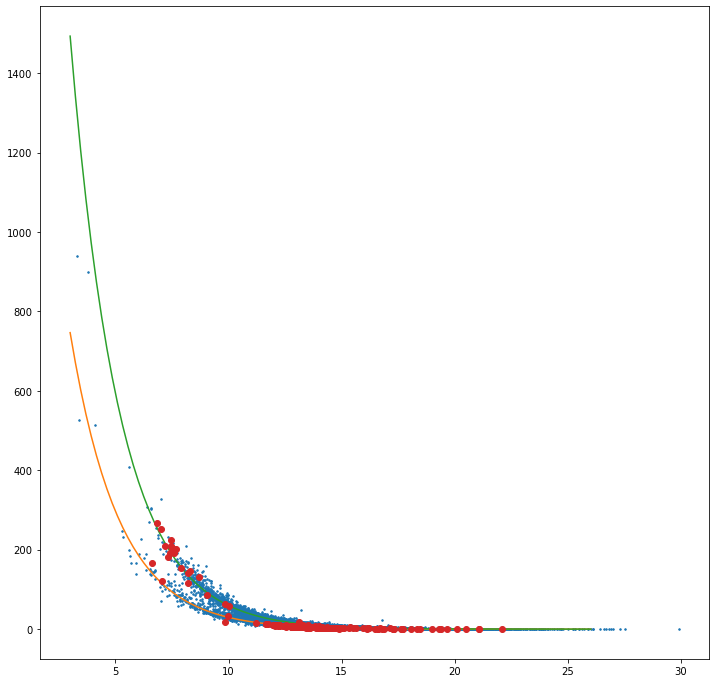

In [14]:
#this plot is the plot of asteroid diameter with respect to magnitude.
#the equation given by NASA, as well as the the median (dist. is skewed) albedo give a very nice trendline
#using this equation, we will calculate diameters of every asteroid with magnitude data in the set
from scipy.stats import spearmanr

figure(figsize=(12,12))

plot(diam_asteroids.H, diam_asteroids.diameter, 'o', ms=1.5)

x_range = linspace(3, 26, 100)
y = 10.**(3.1236 - (0.5*log10(0.2)) - (0.2 * x_range)) #a = albedo = 0.2
plot(x_range, y)

y = 10.**(3.1236 - (0.5*log10(0.050)) - (0.2 * x_range)) #a = albedo = 0.062
plot(x_range, y)

plot(satellite_asteroids.H, satellite_asteroids.diameter, 'o')

print(spearmanr(diam_asteroids.H, diam_asteroids.diameter, nan_policy='omit'))
diam_asteroids

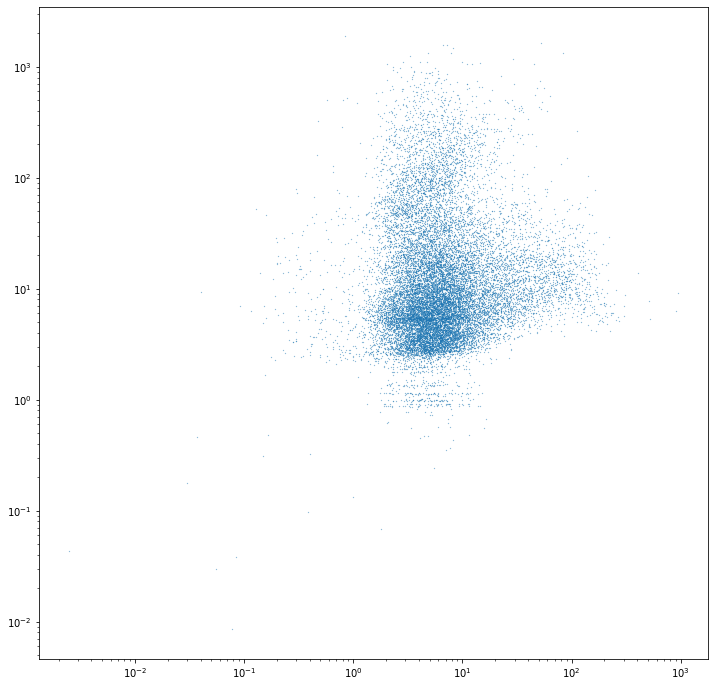

In [15]:
figure(figsize=(12,12))
loglog(diam_asteroids.diameter, diam_asteroids.rot_per, 'o', ms=0.2)

R =  -0.06379220754893543 p = 6.457969894517658e-126


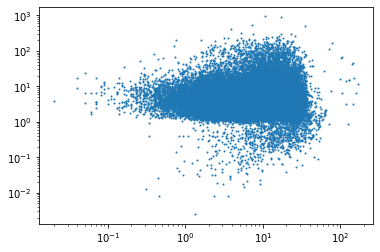

In [16]:
loglog(diam_asteroids.i, diam_asteroids.diameter, 'o', ms=1)
R, p = pearsonr(diam_asteroids.e, diam_asteroids.diameter)
print('R = ', R, 'p =', p)

R =  -0.23062187454368901 p = 0.0


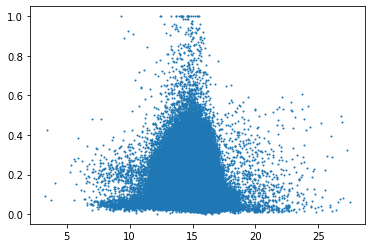

In [17]:
#first, we'll look at whether albedo is correlated with magnitude
#albedo is also not correlated with semi-major axis

bool_index = notnull(asteroids.albedo)
alb_asteroids = asteroids[bool_index]

plot(alb_asteroids.H, alb_asteroids.albedo, 'o', ms=1)

bool_index = notnull(alb_asteroids.H)
alb_asteroids = alb_asteroids[bool_index]

R, p = pearsonr(alb_asteroids.albedo, alb_asteroids.H)
print('R = ', R, 'p =', p)

0.1305430281608195

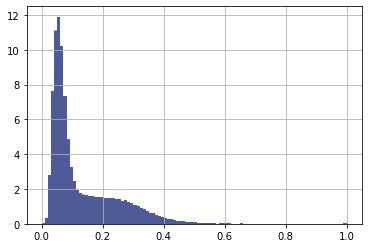

In [18]:
from numpy.random import randint
n = len(alb_asteroids)

random_idx = randint(n,size=len(mag_asteroids))
rand_alb = array(alb_asteroids.albedo)[random_idx]

#the two histograms overlap perfectly
hist(rand_alb, bins=100, density=True)
alb_asteroids.albedo.hist(bins=100, density=True, color=(0.5, 0.25, 0.5, 0.5))

mean(alb_asteroids.albedo)

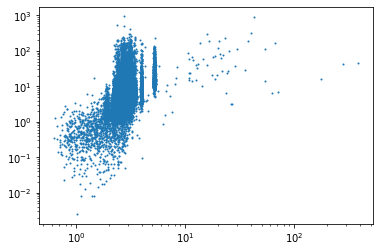

In [19]:
loglog(diam_asteroids.a, diam_asteroids.diameter, 'o', ms=1)

In [20]:
mag_asteroids['calc_diam'] = 10.**(3.1236 - (0.5*log10((rand_alb[mag_asteroids.H.index]))) - (0.2 * mag_asteroids.H))

/var/folders/w5/p8_d6hbs5x57tjj9tbpczy9c0000gn/T/ipykernel_2557/42891803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mag_asteroids['calc_diam'] = 10.**(3.1236 - (0.5*log10((rand_alb[mag_asteroids.H.index]))) - (0.2 * mag_asteroids.H))


In [21]:
random_sat_idx = randint(n,size=len(satellite_asteroids))
rand_sat_alb = array(alb_asteroids.albedo)[random_sat_idx]

satellite_asteroids['calc_diam'] = 10.**(3.1236 - (0.5*log10((rand_sat_alb[satellite_asteroids.H.index]))) - (0.2 * satellite_asteroids.H))

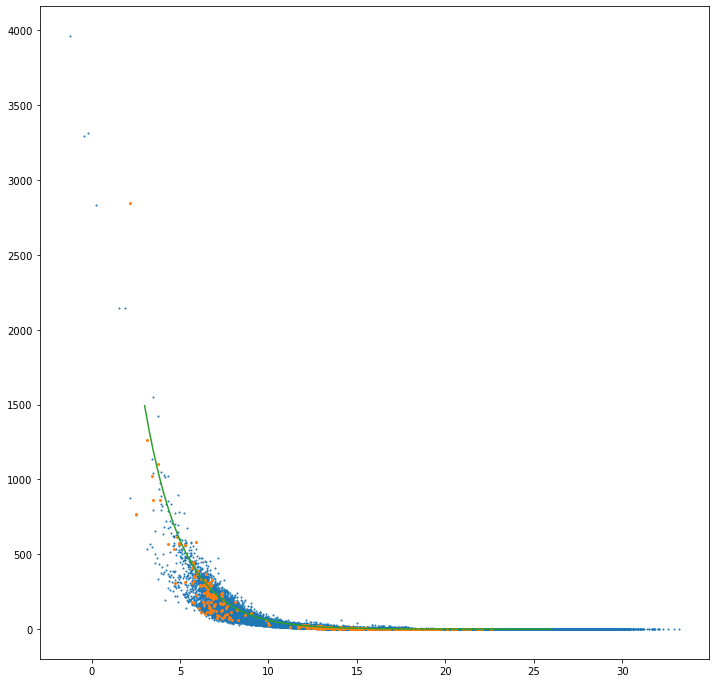

In [22]:
figure(figsize=(12,12))
plot(mag_asteroids.H, mag_asteroids.calc_diam, 'o', ms=1)
plot(satellite_asteroids.H[satellite_asteroids.H > 2], satellite_asteroids.calc_diam[satellite_asteroids.H > 2], 'o', ms=2)
#plot(satellite_asteroids.H, satellite_asteroids.diameter, 'o')
plot(x_range, y)

In [23]:
ascending = mag_asteroids.sort_values(by=['a'])
ascending = ascending.reset_index()

ascending_sat = satellite_asteroids.sort_values(by=['a'])
ascending_sat = ascending_sat.reset_index()


In [24]:
pop_req = 100

dist_groups = []
diam_groups = []
sat_dist_groups = []
sat_diam_groups = []

#give a "normalized" running median by only placing points after a certain number of "population required" asteroids have been indexed
for j in range(len(ascending)):
    if j % pop_req == 0:
        valid_asteroids = ascending[ascending.index < j]
        dist_groups.append(valid_asteroids[valid_asteroids.index > j-pop_req].a.median())
        diam_groups.append(valid_asteroids[valid_asteroids.index > j-pop_req].calc_diam.median())

print('Done!')


Done!


In [25]:
sat_pop_req = 7
sat_dist_groups = []
sat_diam_groups = []

for p in range(len(ascending_sat)):
    if p % sat_pop_req == 0:
        valid_asteroids = ascending_sat[ascending_sat.index < p]
        valid_asteroids = valid_asteroids[valid_asteroids.index > p-sat_pop_req]
        sat_dist_groups.append(valid_asteroids.a.median())
        sat_diam_groups.append(valid_asteroids.calc_diam.median())

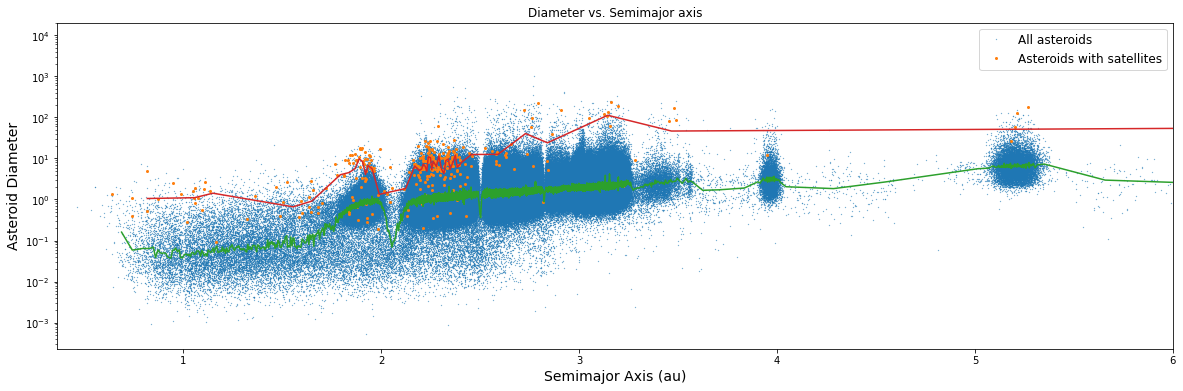

In [26]:
plt.figure(figsize=(20,6))
semilogy(mag_asteroids.a, mag_asteroids.calc_diam, 'o', ms=0.25)
plot(satellite_asteroids.a, satellite_asteroids.calc_diam, 'o', ms=2)

xlim(mag_asteroids.a.min() - 0.1, 6)

plot(dist_groups, diam_groups)
plot(sat_dist_groups, sat_diam_groups)

plt.xlabel('Semimajor Axis (au)', size=14)
plt.ylabel('Asteroid Diameter', size=14)
title('Diameter vs. Semimajor axis')

legend(['All asteroids', 'Asteroids with satellites'], prop={'size' : 12})

savefig('asteroid-diameter-SMA')

In [27]:
valid_asteroids1 = mag_asteroids[mag_asteroids.a > 1.8]
valid_asteroids1 = valid_asteroids1[valid_asteroids1.a < 2.4]
valid_asteroids2 = mag_asteroids[mag_asteroids.a > 2.4]
valid_asteroids2 = valid_asteroids2[valid_asteroids2.a < 2.6]
valid_asteroids3 = mag_asteroids[mag_asteroids.a > 2.8]
valid_asteroids3 = valid_asteroids3[valid_asteroids3.a < 2.84]

dst_grp_1 = []
for i in range(len(dist_groups)):
    if dist_groups[i] > 1.8 and dist_groups[i] < 2.4:
        dst_grp_1.append(True)
    else:
        dst_grp_1.append(False)

diam_grp_1 = array(diam_groups)[dst_grp_1]
dst_grp_1 = array(dist_groups)[dst_grp_1]

dst_grp_2 = []
for i in range(len(dist_groups)):
    if dist_groups[i] > 2.4 and dist_groups[i] < 2.6:
        dst_grp_2.append(True)
    else:
        dst_grp_2.append(False)

diam_grp_2 = array(diam_groups)[dst_grp_2]
dst_grp_2 = array(dist_groups)[dst_grp_2]

dst_grp_3 = []
for i in range(len(dist_groups)):
    if dist_groups[i] > 2.8 and dist_groups[i] < 2.84:
        dst_grp_3.append(True)
    else:
        dst_grp_3.append(False)

diam_grp_3 = array(diam_groups)[dst_grp_3]
dst_grp_3 = array(dist_groups)[dst_grp_3]

#Here are the histograms of the particularly small asteroids vs all the rest

small1 = valid_asteroids1[valid_asteroids1.a < 2.125]
small1 = small1[small1.a > 2.]

small2 = valid_asteroids2[valid_asteroids2.a < 2.515]
small2 = small2[small2.a > 2.492]

small3 = valid_asteroids3[valid_asteroids3.a < 2.827]
small3 = small3[small3.a > 2.819]

for i in range(len(valid_asteroids1)):
    if valid_asteroids1.index[i] == small1.index.any:
        index = valid_asteroids1.index[i]
        valid_asteroids1.drop(index)

for i in range(len(valid_asteroids2)):
      if valid_asteroids2.index[i] == small2.index.any:
        index = valid_asteroids2.index[i]
        valid_asteroids2.drop(index)


for i in range(len(valid_asteroids3)):
     if valid_asteroids3.index[i] == small3.index.any:
        index = valid_asteroids3.index[i]
        valid_asteroids3.drop(index)

In [ ]:
fig = figure(figsize=(20, 20))

ax = fig.add_subplot(3, 2, 1)
semilogy(valid_asteroids1.a, valid_asteroids1.calc_diam, 'o', ms=1)
plot(dst_grp_1, diam_grp_1)
plot([2.125, 2.125], [0, 1000])
plot([2., 2.], [0, 1000])
#xlabel('Semimajor axis (au)')
#ylabel('Diameter (km)')


ax = fig.add_subplot(3, 2, 3)
semilogy(valid_asteroids2.a, valid_asteroids2.calc_diam, 'o', ms=1)
plot(dst_grp_2, diam_grp_2)
plot([2.492, 2.492], [0, 300])
plot([2.515, 2.515], [0, 300])
#xlabel('Semimajor axis (au)')
#ylabel('Diameter (km)')


ax = fig.add_subplot(3, 2, 5)
semilogy(valid_asteroids3.a, valid_asteroids3.calc_diam, 'o', ms=1)
plot(dst_grp_3, diam_grp_3)
plot([2.819, 2.819], [0, 200])
plot([2.827, 2.827], [0, 200])
#xlabel('Semimajor axis (au)')
#ylabel('Diameter (km)')

#hist 1
ax = fig.add_subplot(3, 2, 2)
hist(valid_asteroids1.calc_diam, density=True, bins=10000)
hist(small1.calc_diam, density=True, bins=100, fc=(0, 1., 0.1, 0.5))
ax.set_xlim(0,5)
#xlabel('Diameter (km)')
#ylabel('Probability Density')

arr_small1 = array(small1)
arr_valid1 = array(valid_asteroids1)
t, p = ttest_ind(arr_small1, arr_valid1)
text = 'p =' + str(round(p, 4))
ax.text(2,1.5,text)


#hist 2
ax = fig.add_subplot(3, 2, 4)
hist(valid_asteroids2.calc_diam, density=True, bins=10000)
hist(small2.calc_diam, density=True, bins=1000, fc=(0, 1., 0.1, 0.5))
ax.set_xlim(0, 5)

arr_small12 = array(small2)
arr_valid2 = array(valid_asteroids2)
t, p = ttest_ind(arr_small2, arr_valid2)

text = 'p =' + str(round(p, 4))
ax.text(2,1.5,text)
#xlabel('Diameter (km)')
#ylabel('Probability Density')

#hist 3
ax = fig.add_subplot(3, 2, 6)
hist(valid_asteroids3.calc_diam, density=True, bins=5000)
hist(small3.calc_diam, density=True, bins=50, fc=(0, 1., 0.1, 0.5))

ax.set_xlim(0, 5)
arr_small13 = array(small3)
arr_valid3 = array(valid_asteroids3)
t, p = ttest_ind(arr_small3, arr_valid3)
text = 'p =' + str(round(p, 4))
ax.text(2,1.5,text)
#xlabel('Diameter (km)')
#ylabel('Probability Density')

fig.savefig('diam-plots')
#Semimajor axis of index 0 is 1.7787924478251473
#Semimajor axis of index 1 is 1.9082280286576032
#Semimajor axis of index 2 is 2.064105790784986
#Semimajor axis of index 3 is 2.500486092146311
#Semimajor axis of index 4 is 2.8236570029107275
#Semimajor axis of index 5 is 2.9565649424259464
#Semimajor axis of index 6 is 3.2765637036657393

In [ ]:
#using these plots to determine what are our bounding semimajor axis values

figure(figsize=(8, 8))

plot(dst_grp_1, diam_grp_1, 'o', ms=2)
plot([2.125, 2.125], [0, 2])
plot([2., 2.], [0, 2])

show()
figure(figsize=(8, 8))

plot(dst_grp_2, diam_grp_2, 'o', ms=2)
plot([2.492, 2.492], [0, 2])
plot([2.515, 2.515], [0, 2])


show()
figure(figsize=(8, 8))

plot(dst_grp_3, diam_grp_3, 'o', ms=2)
plot([2.819, 2.819], [0, 2])
plot([2.827, 2.827], [0, 2])




In [ ]:
figure(figsize=(20, 6))

satellite_asteroids[satellite_asteroids.H > 2].calc_diam.hist(density=True, bins=100)
mag_asteroids.diameter.hist(density=True, bins=5000)
ylim(0,0.05)

print(satellite_asteroids.diameter.dropna()[satellite_asteroids.diameter > 250])

In [ ]:
#plot the residuals of the function as a function of albedo to show whether albedo explains the variability observed

#the variation of magnitude with semi-major axis does not appear to be related to albedo distribution, but rather to size of the asteroid, as shown by the plots above.
#it appears that there are larger asteroids farther from the sun.  The question becomes, how do we tell if this is a real feature of the solar system or a skew in the data caused by the difficulty in spotting smaller
#asteroids farther away.

In [ ]:
#there is a wide range of variability of albedo and it appears to vary as a function of semi-major axis. The majority of albedo values are clustered towards the bottom
#in each orbit, however, but there appears to be more high-albedo asteroids in the inner asteroid belt than the outer asteroid belt.
#this is completely consistent with introduction to astrophysics
figure(figsize=(12,12))
plot(alb_asteroids.a, alb_asteroids.albedo, 'o', ms=0.05)
xlim(0.5, 6)
show()

In [ ]:
plt.figure(figsize=(20,6))

loglog(asteroids.a, asteroids.diameter, 'o', ms=1)

In [ ]:
semilogy(alb_asteroids.albedo, alb_asteroids.diameter, 'o')

In [ ]:
print(mean(mag_asteroids.calc_diam), mean(mag_asteroids.diameter))

In [ ]:
satellite_asteroids

In [ ]:
satellite_asteroids[satellite_asteroids.H > 2].calc_diam.hist(density=True, bins=50)

sat_diam = median(satellite_asteroids.calc_diam.dropna())
S_sat = std(satellite_asteroids.calc_diam.dropna())

all_diam = median(mag_asteroids.calc_diam)
S_diam = std(mag_asteroids.calc_diam)

t, p = ttest_ind(satellite_asteroids.calc_diam.dropna(), mag_asteroids.calc_diam, equal_var=False)
print("Welch's T:", round(t, 4),'p-value:', round(p, 8))

In [ ]:
mag_asteroids.calc_diam.hist(density=True, bins=50)


In [ ]:
#this histogram shows a highly bimodal distribution in the magnitude of satellite-containing asteroids
#why is this the case?

satellite_asteroids.H.hist(density=True, bins=50)
mag_asteroids.H.hist(density=True, bins=50)

In [ ]:


figure(figsize=(20,6))
semilogx(mag_asteroids.a, mag_asteroids.H, 'o', ms=0.05)
plot(satellite_asteroids.a, satellite_asteroids.H, 'o', ms=1)
plot([1, 1],[0, 23])

In [ ]:
low_albedo = mag_asteroids[mag_asteroids.albedo < 0.1]
med_albedo = mag_asteroids[mag_asteroids.albedo > 0.1]
med_albedo = med_albedo[med_albedo.albedo < 0.22]
high_albedo = mag_asteroids[mag_asteroids.albedo > 0.22]

figure(figsize=(20, 6))
plot(low_albedo.a, low_albedo.calc_diam, 'o', ms=2)
plot(med_albedo.a, med_albedo.calc_diam, 'o', ms=2)
plot(high_albedo.a, high_albedo.calc_diam, 'o', ms=2)

xlim(0,6)

In [ ]:
semilogy(mag_asteroids.albedo, mag_asteroids.calc_diam, 'o', ms=1)

In [ ]:
figure(figsize=(12,12))
semilogy(mag_asteroids.e, mag_asteroids.calc_diam, 'o', ms=0.2)

In [ ]:
figure(figsize=(20,6))
semilogx(asteroids.a, asteroids.e, 'o', ms=1)

In [ ]:
min(inner_asteroids.q)